<a href="https://colab.research.google.com/github/StillWork/book6/blob/master/gh_02_ROC_%E1%84%83%E1%85%A1%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%87%E1%85%A7%E1%86%AB%E1%84%89%E1%85%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC, 다중변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score


%config InlineBackend.figure_format = 'retina'


In [2]:
def conf_matrix(y_test, y_pred):
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

def draw_roc(y_test, score):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr, tpr, _ = roc_curve(y_test, score)
  roc_auc = roc_auc_score(y_test, score)
  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, label='AUC = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
def draw_pr(y_test, score):
  pre = dict()
  rcl = dict()
  ap = dict()
  pre, rcl, _ = precision_recall_curve(y_test, score)
  ap = average_precision_score(y_test, score)
  plt.figure(figsize=(6,6))
  plt.plot(rcl, pre, label='AP = %0.4f)' % ap)
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend(loc="lower right")

- ROC for positive [1]

랭킹평가를 위해서 점수 또는 확률이 필요하다
- decision_function() 
또는 predict_proba() 함수를 사용한다


In [5]:
score = np.linspace(1, 0.6, 10).round(2)
score

array([1.  , 0.96, 0.91, 0.87, 0.82, 0.78, 0.73, 0.69, 0.64, 0.6 ])

In [16]:
import numpy as np
# score = np.linspace(1,0,10).round(1)

y_test = [1,1,0,1,0,0,1,0,0,0] # 실제 레이블
y_pred = [1,1,1,1,1,0,0,0,0,0] # 예측한 레이블
conf_matrix(y_test, y_pred)

[[4 2]
 [1 3]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



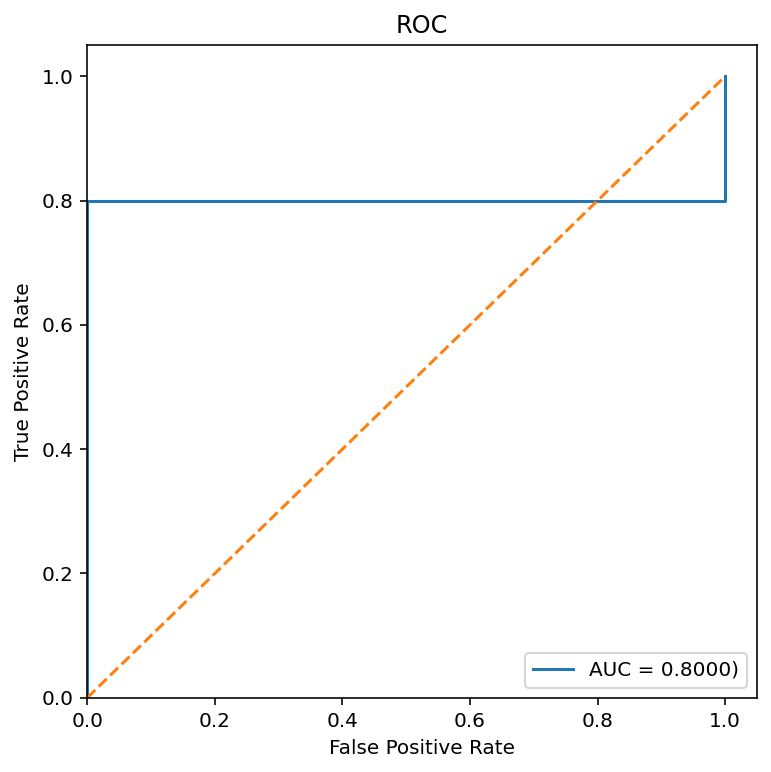

In [14]:
draw_roc(y_test, score)

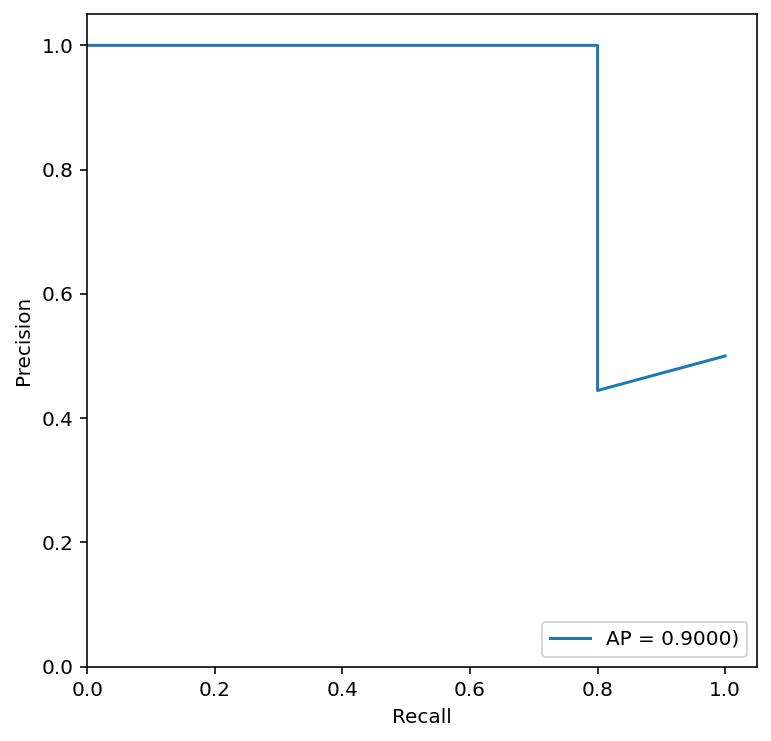

In [15]:
draw_pr(y_test, score)

- ROC for negative [0]

In [17]:
inverse_y_test = [0 if s else 1 for s in y_test]


In [18]:
inverse_y_test

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [19]:
score

array([1.  , 0.96, 0.91, 0.87, 0.82, 0.78, 0.73, 0.69, 0.64, 0.6 ])

In [20]:
inverse_score = score[::-1]
# score = -score
inverse_score

array([0.6 , 0.64, 0.69, 0.73, 0.78, 0.82, 0.87, 0.91, 0.96, 1.  ])

(1) model.predict_proba()[0]
(2) - (model.predict_proba()[1])
(3) score = -score

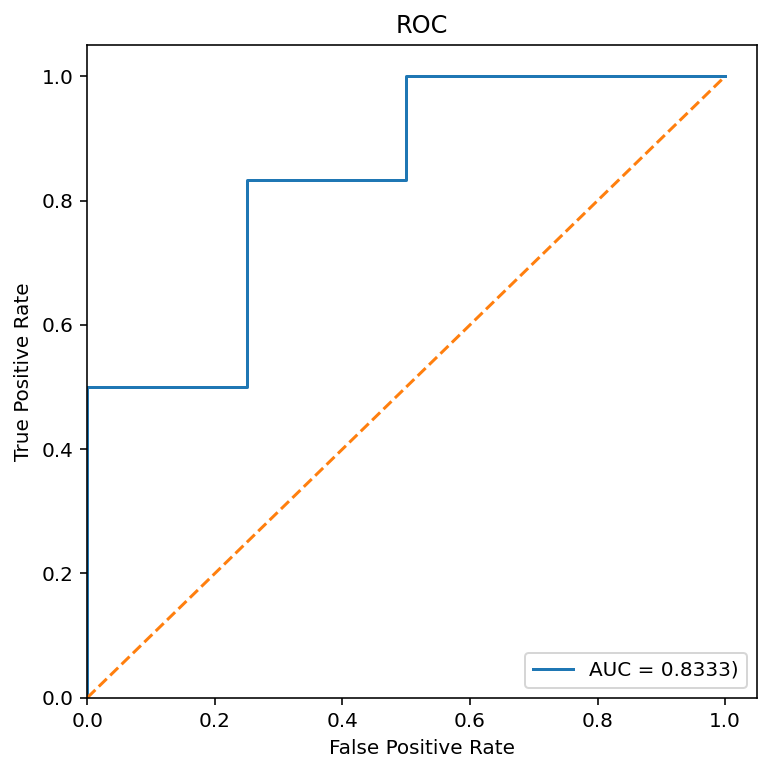

In [21]:
# inverse_y_test = [0 if s else 1 for s in y_test]
# inverse_score = score[::-1]
# or probability of [0] rather that [1]
draw_roc(inverse_y_test, inverse_score)

- 붓 꽃을 이용한 3가지 분류에서 ROC를 각각 그리는 방법

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Add noisy features to make the problem harder
n_samples, n_features = X.shape

In [ ]:
n_samples, n_features

(150, 4)

In [ ]:
# X2 = np.c_[X, np.random.randn(n_samples, 200 * n_features)]
noise = np.random.randn(n_samples, n_features)*1.5
X2 = X + noise

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.5,
                                                    random_state=9)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=9))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

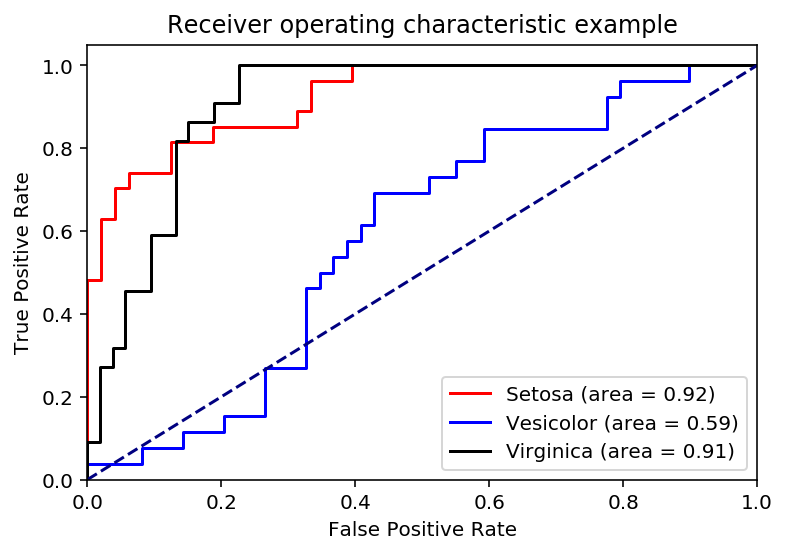

In [ ]:
plt.plot(fpr[0], tpr[0], color='r',
         label='Setosa (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='b',
         label='Vesicolor (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='k',
         label='Virginica (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

- 같은 동작

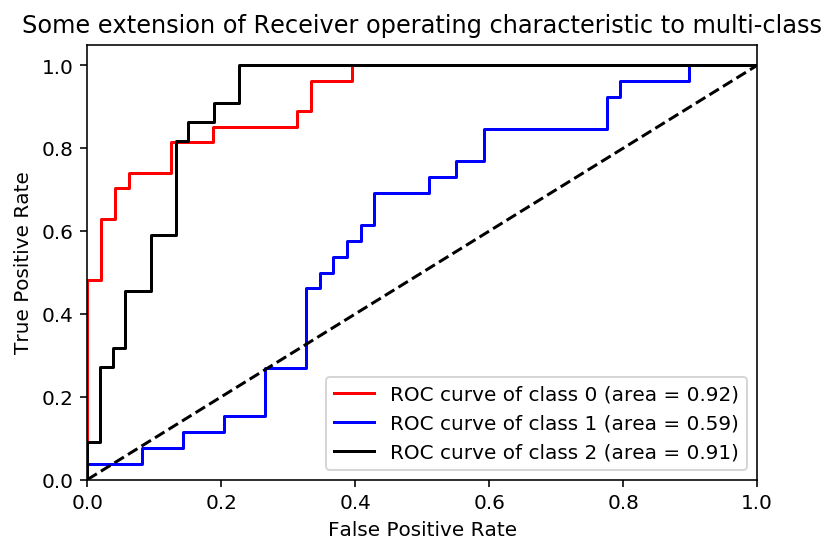

In [ ]:
colors = cycle(['r', 'b', 'k'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()